# LCPB 21-22 exercise 2: *Deep Neural Network (DNN)*

#### TASKS

1. Study the performance of the DNN when the number N of samples is
a) reduced
b) increased
c) augmented
Point 1.c means taking the given N=4000 samples, split them in training and validation, and
“augment” the training samples by generating artificial ones that are similar to the real samples. For
instance, a given sample x=(x1,x2) can be transformed to multiple copies (x1+s1, x2+s2) where
each (s1,s2) is a small random shift.
2. Implement a “grid search” as shown in NB11 to improve one or more of the aspects or
parameters of the model. Possible tests include: different activation units (sigmoid, relu, elu,
etc.), different minimization algorithms (ADAM, RMSprop, Nesterov, etc.), different
dropouts, different size or number of layers, etc.

##### *OPTIONAL*

3. Check if any other rescaling of data or initialization of weights may improve the accuracy of the
DNN.
4. Study different data, for instance generated by the second nonlinear function or other choices.

In [1]:
# importing cell
import numpy as np
import matplotlib.pyplot as plt
# DNN stuff
from keras.models import Sequential
from keras.layers import Dense, Dropout


# random seed for reproducibility
np.random.seed(42)

In [2]:
#!mkdir DATA

## Data generation


In [3]:
# defining non linear function to interpolate

#f is the labelling function,case c = 2 will only be used in the optional part
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r

#needed to save data and labels
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"


In [4]:
#Now we generate the original dataset

# number of data
N=4000

# size of each sample
L=2

# box size
B=100

!mkdir DATA

TYPE=1


x, y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],c = 1)       

np.savetxt(filename("data_original",TYPE),x)
np.savetxt(filename("labels_original",TYPE),y,fmt="%d")

Sottodirectory o file DATA già esistente.


<function matplotlib.pyplot.show(close=None, block=None)>

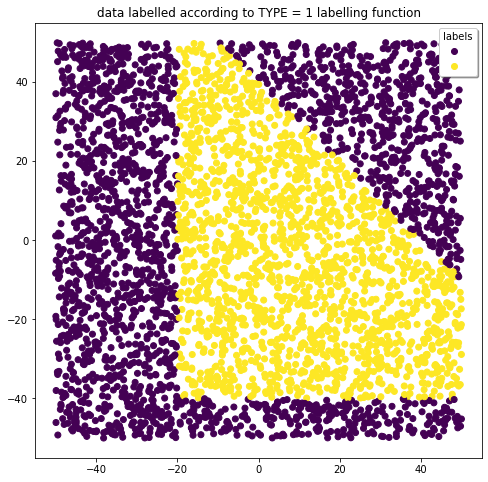

In [5]:
#plotting the original dataset with TYPE = 1
        
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8,8))
scatter = ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data labelled according to TYPE = 1 labelling function")
ax.legend(handles=scatter.legend_elements()[0], 
           title="labels", shadow = True)
plt.show

## Training


In [6]:
#percentage of data used for training
perc_train = 0.8

# Keras works with numpy arrays: just use them from the start
x = np.loadtxt(filename("data_original",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels_original",TYPE), delimiter=' ')

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}') #printing the length of the whole dataset and the length of the training set

data: 4000
train: 3200


In [20]:
# Train-Test splitting
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_test, y_test) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t test:",len(x_test))

Train: 3200 	 test: 800


In [8]:
# Rescaling data dividing them by their variance, the mean is already zero.
def Rescale(x):
    return x/50

x_train = Rescale(x_train)
x_test = Rescale(x_test)

In [9]:
# Definition of two models of neural network
nepoch=200

model1 = Sequential()
model1.add(Dense(L,input_shape=(L,),activation='relu'))
model1.add(Dense(20,activation='relu'))
model1.add(Dense(20,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(L,input_shape=(L,),activation='sigmoid'))
model2.add(Dense(3,activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid'))
    
print(model1.summary())
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Ou

In [10]:
# compile it with a given loss function and optimizer algorithm
model1.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

model2.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# TRAINING

fit1 = model1.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_test,y_test),
               verbose=0)

fit2 = model2.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_test,y_test),
               verbose=0)


Okay so we have trained our model; now we look at the loss progression during training, both on training and validation sets.

In [12]:
# the .fit() method of the Keras Model class returns a history object,
# whose attribute History.history is basically a dictionary:
fit1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

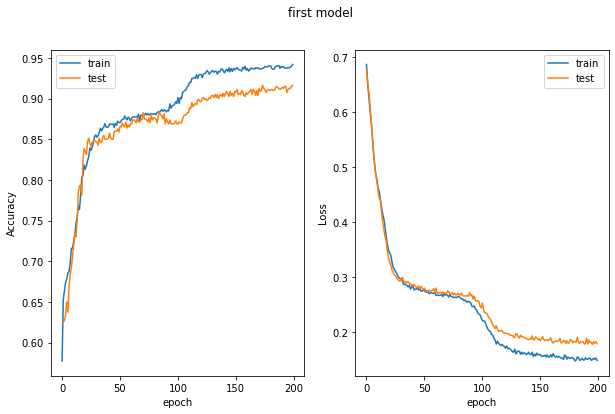

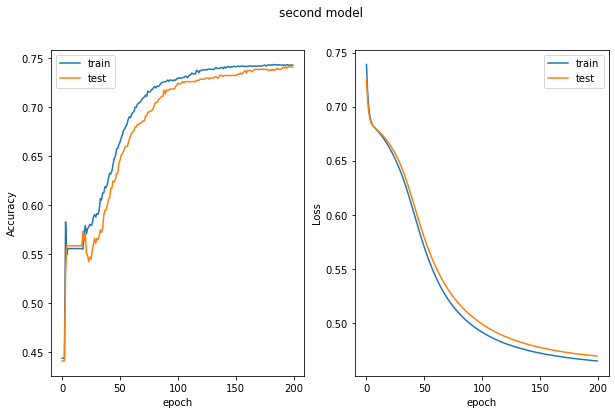

In [13]:
#plotting the accuracy and the loss for the first model
fig,axs=plt.subplots(1,2,figsize=(10,6.))
axs[0].plot(fit1.history['accuracy'],label="train")
axs[0].plot(fit1.history['val_accuracy'],label="test")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel("Accuracy")

axs[1].plot(fit1.history['loss'],label="train")
axs[1].plot(fit1.history['val_loss'],label="test")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel("Loss")

plt.suptitle('first model')
for ax in axs: ax.legend()

plt.show()

#plotting the accuracy and the loss for the second model
fig,axs=plt.subplots(1,2,figsize=(10,6.))
axs[0].plot(fit2.history['accuracy'],label="train")
axs[0].plot(fit2.history['val_accuracy'],label="test")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel("Accuracy")

axs[1].plot(fit2.history['loss'],label="train")
axs[1].plot(fit2.history['val_loss'],label="test")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel("Loss")
plt.suptitle('second model')
for ax in axs: ax.legend()
    
plt.show()

In [38]:
#let's generate the modified training sets
N_red = 2000
(x_train_red, y_train_red) = (x_train[:N_red], y_train[:N_red])

N_in = 2000
x_train_plus, y_train_plus = (np.random.random((N_in,2))-0.5)*B, np.zeros(N_in)
for i in range(N_in):
    y_train_plus[i] = f(x_train_plus[i],TYPE)

print(y_train_plus.shape)
print(y_train.shape)
    
x_train_in = np.vstack((x_train,x_train_plus))
y_train_in = np.hstack((y_train,y_train_plus))

print(x_train_in)
print(y_train_in)


(2000,)
(3200,)
[[-12.54598812  45.07143064]
 [ 23.19939418   9.86584842]
 [-34.39813596 -34.40054797]
 ...
 [-22.34342855  17.14333635]
 [-20.89957784  33.37908301]
 [ 33.4089455  -19.36903506]]
[1. 1. 0. ... 0. 0. 1.]


In [14]:
'''
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)
'''

'\ndX = 2\nX1 = np.arange(-50,50+dX, dX)\nLG = len(X1)\ngrid = np.zeros((LG*LG,2))\nk=0\nfor i in range(LG):\n    for j in range(LG):\n        grid[k,:]=(X1[j],X1[i])\n        k=k+1\nprint(len(X1),len(grid))\nprint(grid[-1])\n\n# RESCALE\n\ngrid_r = grid/50\n\npred = model.predict(grid_r)\n'

In [15]:
'''
def boundaries():    
    # function to plot white lines corresponding to the boundaries
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y) # original data
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred) # predicted data
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
'''

'\ndef boundaries():    \n    # function to plot white lines corresponding to the boundaries\n    ax.plot((-20,-20),(-40,50),c="w")\n    ax.plot((-20,50),(-40,-40),c="w")\n    ax.plot((-10,50),(50,-10),c="w")\nfig,AX=plt.subplots(1,3,figsize=(16,5.))\nax=AX[0]\nax.scatter(x[:,0],x[:,1],c=y) # original data\nboundaries()\nax=AX[1]\nax.scatter(grid[:,0],grid[:,1],c=pred) # predicted data\nboundaries()\nax=AX[2]\nW1=np.where(pred>0.5)[0] \nax.scatter(grid[:,0],grid[:,1],c="#440154")\nax.scatter(grid[W1,0],grid[W1,1],c="#fde725")\nboundaries()\nplt.show\nplt.show\n'

In [16]:
'''
def build_DNN(layer_arch, act_arch,act_inout,dropout=False,dropout_rate=0.2):
    """
    Function to build a Keras Sequential NN model with a given architecture and activation functions. 
    First layer is already defined to have 2 neurons (x and y) and output layers is already defined to have one output (z)
    Args:

    layer_arch : tuple, list, or iterable of integers that define each hidden layer
    act_arch : tuple, list, or iterable of string defining the activation function for each hidden layer. Must be the same size as layer_arch
    act_inout : touple or list of two string elements, defining the activation function of the input layer and the output layer.
    dropout : bool (default False); if True adds a Dropout layer between the last hidden layer and the output layer.
    """
    if len(layer_arch != len(act_arch)):
        raise Exception('Unmatched activation and layer architecture sizes!')

    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=act_inout[0])) # input layer

    for n_neurons,act in zip(layer_arch,act_arch):
        model.add(Dense(n_neurons,activation=act))

    if dropout:
        model.add(Dropout(dropout_rate))
        
    model.add(Dense(1,activation='sigmoid')) # output layer
    
    return model
'''

'\ndef build_DNN(layer_arch, act_arch,act_inout,dropout=False,dropout_rate=0.2):\n    """\n    Function to build a Keras Sequential NN model with a given architecture and activation functions. \n    First layer is already defined to have 2 neurons (x and y) and output layers is already defined to have one output (z)\n    Args:\n\n    layer_arch : tuple, list, or iterable of integers that define each hidden layer\n    act_arch : tuple, list, or iterable of string defining the activation function for each hidden layer. Must be the same size as layer_arch\n    act_inout : touple or list of two string elements, defining the activation function of the input layer and the output layer.\n    dropout : bool (default False); if True adds a Dropout layer between the last hidden layer and the output layer.\n    """\n    if len(layer_arch != len(act_arch)):\n        raise Exception(\'Unmatched activation and layer architecture sizes!\')\n\n    model = Sequential()\n    model.add(Dense(L,input_shap

In [17]:
'''
architectures = [
    (10,10),
    (20,),
    (5,5)
]

activations = [
    ('relu','relu'),
    ('sigmoid',),
    ('relu','sigmoid')
]

act_inouts = [
    ('sigmoid','sigmoid'),
    ('relu','sigmoid'),
    ('relu','relu')
]

dropouts = [
    True,
    True,
    True
]

dropout_rates = [
    0.2,
    0.2,
    0.2
]
'''

"\narchitectures = [\n    (10,10),\n    (20,),\n    (5,5)\n]\n\nactivations = [\n    ('relu','relu'),\n    ('sigmoid',),\n    ('relu','sigmoid')\n]\n\nact_inouts = [\n    ('sigmoid','sigmoid'),\n    ('relu','sigmoid'),\n    ('relu','relu')\n]\n\ndropouts = [\n    True,\n    True,\n    True\n]\n\ndropout_rates = [\n    0.2,\n    0.2,\n    0.2\n]\n"

In [18]:
'''
for arch,acts,act_io,drop,droprate in zip(architectures,activations,act_inouts,dropouts,dropout_rates):
    model = build_DNN(arch,acts,act_io,drop,droprate)
'''    

'\nfor arch,acts,act_io,drop,droprate in zip(architectures,activations,act_inouts,dropouts,dropout_rates):\n    model = build_DNN(arch,acts,act_io,drop,droprate)\n'

In [ ]:
#GRIDSEARCH 

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=1, 
                        batch_size=batch_size, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

